# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [1]:
# Paso 1: Cargar el dataset
import pandas as pd

df = pd.read_csv('zoo.csv')
df.head()


,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)

from sklearn.preprocessing import StandardScaler

animal_names = df.iloc[:, 0]
labels_true = df.iloc[:, -1]
# Eliminar primera y ultima columna 
X = df.iloc[:, 1:-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

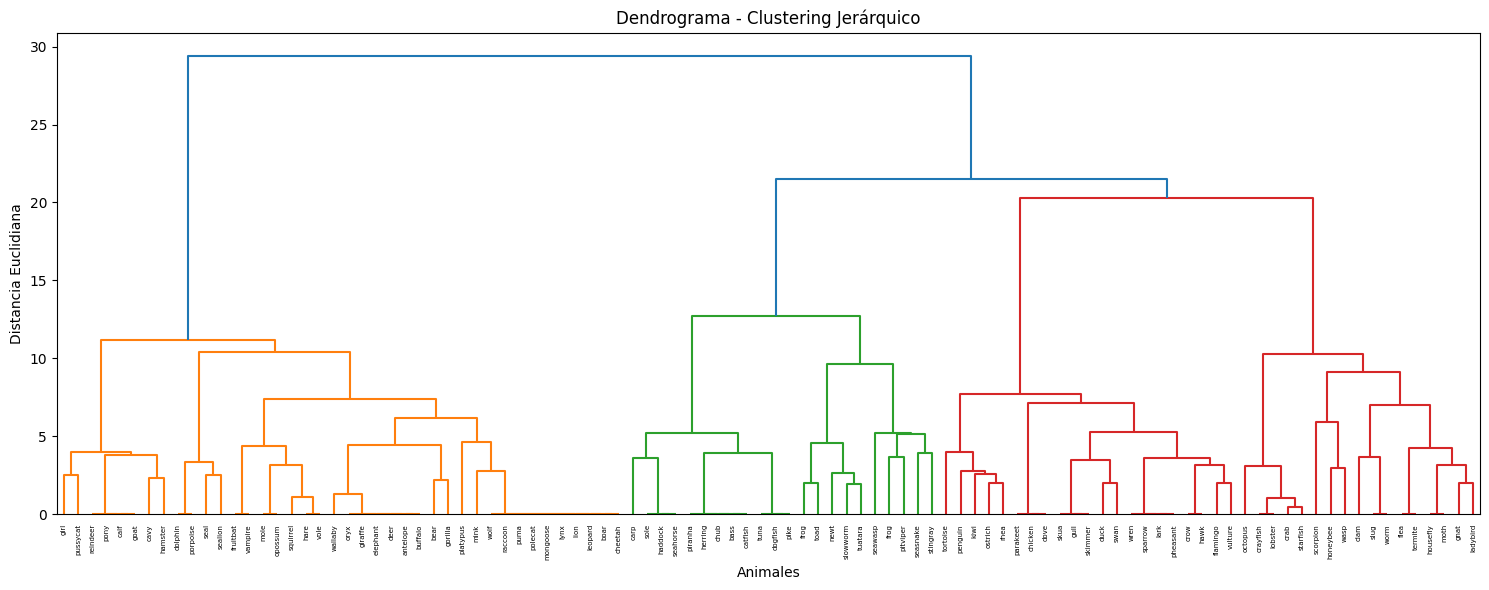

In [4]:
# Paso 3: Clustering Jerárquico
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Crear dendrograma
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'), labels=animal_names.values, leaf_rotation=90)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Animales')
plt.ylabel('Distancia Euclidiana')
plt.tight_layout()
plt.show()


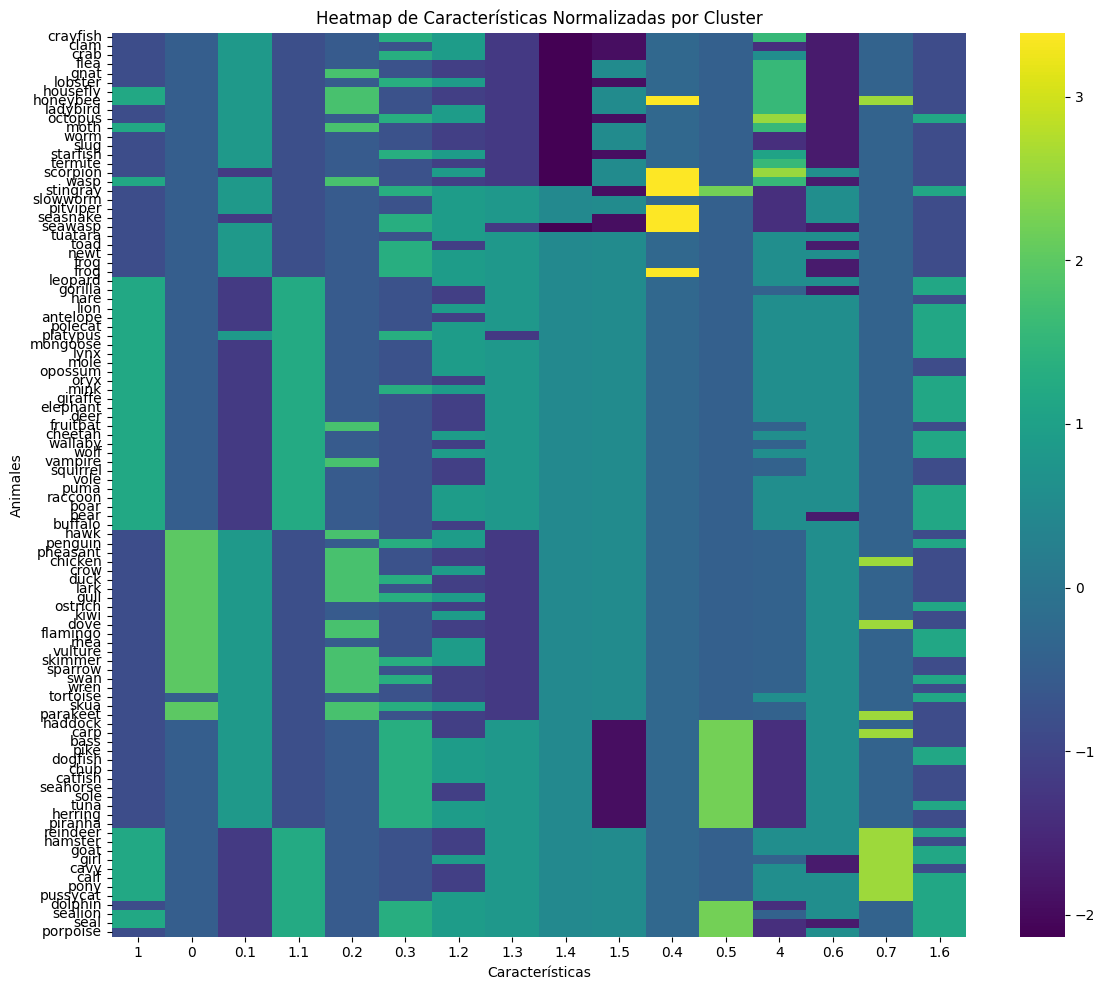

In [ ]:
# Paso 4: Heatmap
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

# Clustering jerárquico (suponiendo 7 clusters, puedes ajustar según dendrograma)
cluster_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
cluster_labels = cluster_model.fit_predict(X_scaled)

df_heatmap = pd.DataFrame(X_scaled, index=animal_names)
df_heatmap['Cluster'] = cluster_labels
df_heatmap_sorted = df_heatmap.sort_values('Cluster')
df_heatmap_sorted = df_heatmap_sorted.drop(columns='Cluster')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap_sorted, cmap='viridis', xticklabels=X.columns, yticklabels=df_heatmap_sorted.index, cbar=True)
plt.title('Heatmap de Características Normalizadas por Cluster')
plt.xlabel('Características')
plt.ylabel('Animales')
plt.tight_layout()
plt.show()


# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?
- Observando el dendrograma, se pueden identificar 7 grupos principales si se corta el árbol en un nivel medio-alto, justo antes de que se unan ramas muy distantes. Esto coincide con el número que usamos en el modelo (n_clusters=7).

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

- Viendo el heatmap, se puede notar que hay atributos que formar grandes grupos como los de respirar y tener columna vertebral, que poseen a la mayoria de los animales. También podemos notar como en el atributo de "pelo" (primer atributo) se agrupan una gran cantidad de mamiferos, al igual que en "plumas"(segunda columna) se agrupan la mayoria de las aves.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

- En general, sí. Se nota que los animales que vuelan (como aves) tienden a agruparse, los acuáticos también (peces, delfines, etc.) y los mamíferos también forman un grupo. No es perfecto, pero el algoritmo logró captar patrones que tienen sentido desde un punto de vista biológico.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

- La normalización hace que todas las características tengan el mismo peso. Sin esto, características con valores más grandes podrían dominar la distancia entre animales. Por ejemplo, si una característica va de 0 a 100 y otra de 0 a 1, la primera influiría mucho más si no normalizamos, para este dataset en particular no seria demasiado grave, ya que solo el atributo de legs es una variable númerica, el resto de valores son binarios, pero es una buena practica normalizar antes de realizar análisis.


## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

- Usé el método Ward porque es uno de los más comunes y tiende a formar grupos de tamaño similar. Este método intenta minimizar la varianza dentro de cada cluster. Funciona bien cuando los datos están normalizados y se quiere una buena separación entre grupos.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

- Se podrian intentar algoritmos como:
    - K-Means, porque es sencillo y rápido, aunque requiere definir el número de clusters desde el inicio.
    - DBSCAN, que no necesita definir el número de clusters y detecta bien grupos densos, aunque puede no funcionar tan bien si los datos no están bien separados.

- Además del clustering jerárquico, se pueden aplicar otras técnicas útiles:

    K-Means: particiona los datos en k grupos intentando minimizar la distancia interna de cada cluster. Es eficiente y fácil de interpretar, pero requiere definir previamente el número de clusters. Puede ser útil en este caso si ya tenemos una idea clara de cuántos grupos biológicos esperamos (por ejemplo, mamíferos, aves, peces, etc). Sin embargo, no es bueno si los clusters tienen mucho solapamiento entre grupos.

    DBSCAN : Este método agrupa datos basándose en su densidad, por lo que no necesita especificar el número de clusters. Es especialmente útil cuando hay ruido o datos atípicos, ya que los detecta automáticamente. En este dataset podría ser útil si los animales formaran grupos densos pero irregulares. Su principal desventaja es que puede fallar si los grupos tienen densidades muy distintas.
